In [3]:
# import Packages
import matplotlib.pyplot as plt
from numpy.random import normal
from numpy import std
from numpy import mean
from scipy.stats import norm

# 1.Summarize Density with Histogram

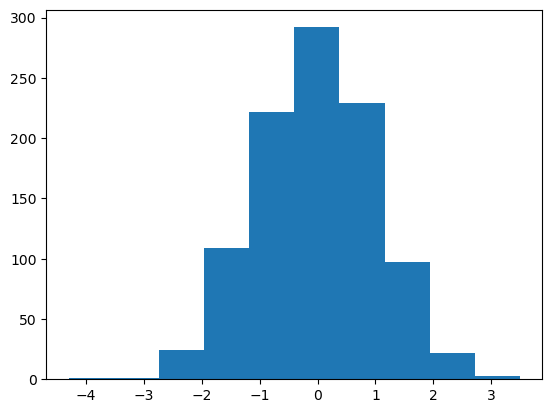

In [6]:
sample = normal(size=1000)
plt.hist(sample,bins=10)
plt.show()

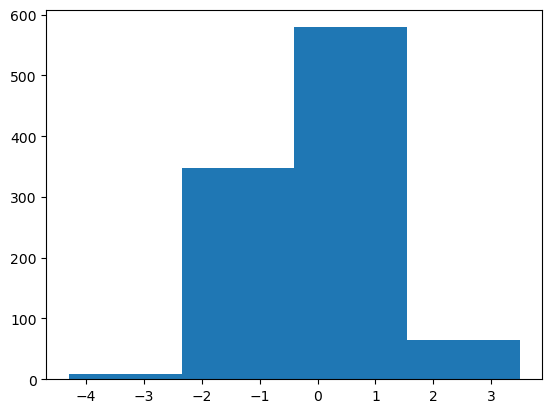

In [8]:
plt.hist(sample,bins=4)
plt.show()

# 2.Parametric Density Estimation

In [15]:
sample = normal(loc=50, scale=5, size=1000) # loc - mean, scale-SD
sample

array([54.88686176, 47.93906961, 54.88191063, 41.21928826, 45.32517184,
       48.59381523, 50.21297082, 45.67052962, 58.02048989, 50.90624608,
       54.12527266, 51.98639319, 48.39563754, 48.38391754, 46.41265961,
       47.59453711, 53.28609005, 42.75271559, 55.59746383, 51.14212051,
       50.47603314, 58.56823688, 44.42084261, 50.43652468, 49.05162488,
       52.50978504, 50.44003146, 57.80364022, 45.64928359, 54.15179681,
       55.88657465, 51.02593114, 51.40884275, 55.33652285, 50.38889643,
       48.28530046, 43.14019756, 53.8391859 , 52.50777245, 39.28810704,
       47.84771773, 47.70885554, 53.00499541, 45.15813638, 52.56451342,
       55.5287164 , 44.28079309, 47.07525753, 45.21322406, 56.19343286,
       48.70265224, 52.14965593, 53.55956726, 42.23505916, 49.70994265,
       55.39035488, 56.00455485, 38.57971475, 43.26290136, 57.73044925,
       48.63047124, 64.16081821, 49.90889426, 53.05580481, 50.21102994,
       59.9634798 , 52.14586349, 48.49013873, 43.382091  , 50.54

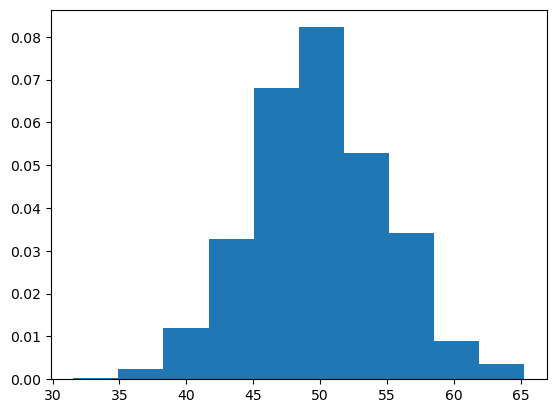

In [16]:
plt.hist(sample, bins=10, density=True)
plt.show()

In [17]:
# calculte parameter
sample_mean = mean(sample)
sample_std = std(sample)

print('sample_mean : ', sample_mean)
print('sample_std : ', sample_std)

sample_mean :  49.85246916978725
sample_std :  5.0474159526967535


In [19]:
dist = norm(sample_mean,sample_std)
dist

In [21]:
values = [value for value in range(30,70)]
probabilities = [dist.pdf(value) for value in values]
probabilities

[3.455961223073372e-05,
 7.387015388567793e-05,
 0.00015181763399046673,
 0.00030000500923717754,
 0.0005700170759442664,
 0.0010413585760557223,
 0.0018292194151665049,
 0.003089472820600872,
 0.0050171377807010625,
 0.007833949163725012,
 0.011761387057387402,
 0.016978112550578493,
 0.02356532026068163,
 0.03144925462371805,
 0.040355286917779974,
 0.04979016831134784,
 0.05906630745006203,
 0.06737350186377343,
 0.0738909913175854,
 0.07791963997416848,
 0.07900515940743395,
 0.07702239918815758,
 0.07219908663226185,
 0.06507279139209195,
 0.05639235642031381,
 0.046988774709715374,
 0.0376461935412491,
 0.02900020668741991,
 0.021479995596646026,
 0.01529749623996875,
 0.01047513417575233,
 0.006896867876217007,
 0.004366136310910657,
 0.0026576375209033864,
 0.0015554185540115532,
 0.0008752898172326729,
 0.0004735976615012546,
 0.00024638842125020366,
 0.00012324920101824583,
 5.927901827841169e-05]

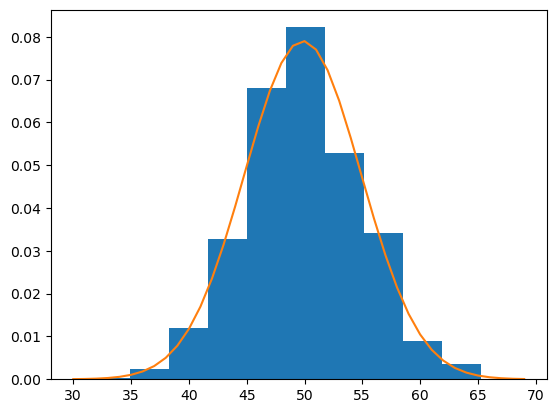

In [25]:
plt.hist(sample,bins=10, density=True)
plt.plot(values, probabilities)
plt.show()

# 3. Nonparametric Density Estimation

In [31]:
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity

In [38]:
# generate dataset
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1,sample2))
sample

array([23.59738283, 19.3446937 , 20.99438961, 21.33583052, 19.76207723,
       17.45114187, 20.50793653, 24.60114863, 16.27356916, 17.76373107,
       24.34795439, 14.56667452, 24.83833884, 29.0542627 , 18.61283935,
       24.61430534, 13.08966459, 14.27740364, 13.38506101, 16.07191195,
       27.64400347, 19.53124485, 23.01211535, 18.96838427, 20.20414022,
       21.55047884, 21.51622587, 15.57067161, 20.90857822, 20.63042486,
       20.15788684, 17.10826849, 25.6627193 , 23.07561539, 23.2055369 ,
       25.31605576, 22.7951852 , 20.82782918, 19.63867265, 16.6612497 ,
       15.08995261, 27.01635325, 17.00861426, 17.43569531, 23.1104231 ,
       20.98034683, 23.98722342, 20.01470919, 20.32292412, 26.90120153,
       17.6972842 , 23.16811186, 14.79517594, 23.28296605, 10.95209679,
       19.22281636, 22.45451604, 20.85174218, 22.42205322, 21.4914701 ,
       18.69146924, 20.17152562, 20.75292369, 26.43989892, 22.23444333,
       22.34862974, 15.66209159, 16.71676014, 19.92601535, 22.90

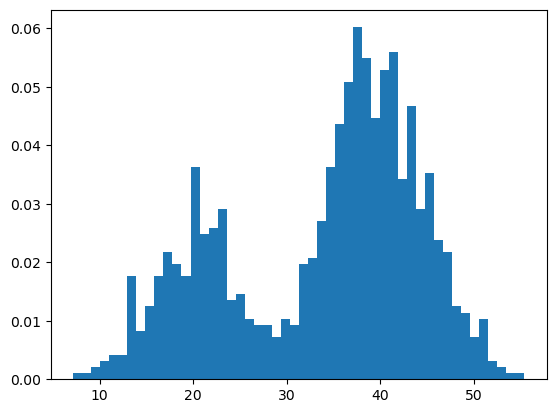

In [39]:
plt.hist(sample,bins=50, density=True)
plt.show()

In [40]:
# fit Density

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape(len(sample),1)
model.fit(sample)

KernelDensity(bandwidth=2)

In [45]:
values = asarray([value for value in range(1,60)])
values = values.reshape(len(values),1)
probabilities = model.score_samples(values)
probabilities = exp(probabilities)
probabilities

array([1.88402524e-06, 8.19046094e-06, 2.85844782e-05, 8.14057503e-05,
       1.93622729e-04, 3.96565784e-04, 7.25419190e-04, 1.23074889e-03,
       1.99561076e-03, 3.12855373e-03, 4.70015336e-03, 6.65513181e-03,
       8.81801941e-03, 1.10384103e-02, 1.33096757e-02, 1.56994452e-02,
       1.82063519e-02, 2.07192661e-02, 2.30118063e-02, 2.46857566e-02,
       2.52195423e-02, 2.42423341e-02, 2.18424133e-02, 1.86143481e-02,
       1.53664632e-02, 1.27226705e-02, 1.09658221e-02, 1.02043846e-02,
       1.05906706e-02, 1.23246847e-02, 1.54904897e-02, 1.99640069e-02,
       2.54817301e-02, 3.16995936e-02, 3.80967389e-02, 4.38852374e-02,
       4.82064292e-02, 5.05583618e-02, 5.10047309e-02, 4.99144524e-02,
       4.76046910e-02, 4.43176880e-02, 4.03548481e-02, 3.60061306e-02,
       3.13980140e-02, 2.65774282e-02, 2.17379682e-02, 1.72377558e-02,
       1.33638324e-02, 1.01509857e-02, 7.46215208e-03, 5.19422041e-03,
       3.36174381e-03, 2.01202042e-03, 1.12128760e-03, 5.86761622e-04,
      

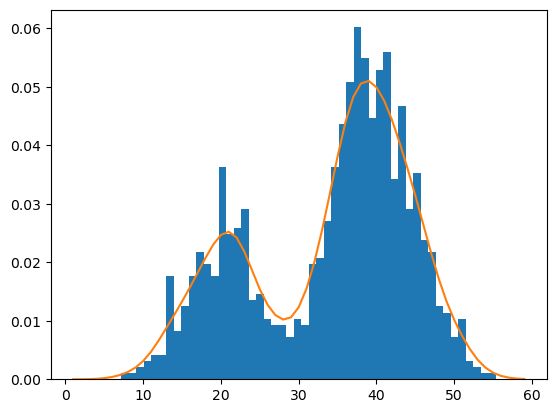

In [46]:
# plot
plt.hist(sample,bins=50, density=True)
plt.plot(values, probabilities)
plt.show()